### Complete Dataset

In [3]:
#------------------------------------------------------------------------------------
#IMPORT THE REQUIRED LIBRARIES
#------------------------------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from utils_gaia import heatmapconf_recall_prec
import seaborn as sns
import matplotlib.pyplot as plt  
import timeit
import warnings

warnings.filterwarnings("ignore")

#Data loading
df= pd.read_csv("Spectrums_columns.csv")
df = df.drop(columns=['Unnamed: 0'])

#We standardize, average 0 standard deviation 1
scaler=StandardScaler()
fited=scaler.fit(df.iloc[:,6:66])
df.iloc[:,6:66]=scaler.transform(df.iloc[:,6:66])
scaler=StandardScaler()
fited=scaler.fit(df.iloc[:,66:])
df.iloc[:,66:]=scaler.transform(df.iloc[:,66:])

In [4]:
#Creation of the train and test dataset

X = df.iloc[:,6:]
y = df["feature"]

#Seed
seed = 4

#Train and test creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
#Label for the heatmap
label = list(np.unique(y))

### Decision Tree

In [5]:
#---------------
#DECISION TREE 
#--------------

#Model training
tic = timeit.default_timer()

#-----------------------------------------------------------------------------------------------------------
DT = DecisionTreeClassifier(criterion = 'gini', max_depth = None, max_features= 'sqrt',\
                                min_samples_split= 55,  random_state = seed, class_weight = 'balanced')
DT.fit(X_train, y_train)
#-----------------------------------------------------------------------------------------------------------

toc = timeit.default_timer()
TimeDT = toc -tic
print ("Computation time = " + str((toc - tic)) + "s") 

Computation time = 2.483466700000008s


In [6]:
tic = timeit.default_timer()

#-----------------------------------------------------------------------------------------------------------
#Stratified 4-fold cross validation
skf = StratifiedKFold(n_splits=4, random_state = seed)
crossDT_sub = cross_val_score(DT, X_train, y_train, cv=skf, scoring= "accuracy")

print('The cross-validation values for 4 sets are', crossDT_sub)
print('The cross validation average on the 4 sets is {0:.3f}'.format(np.mean(crossDT_sub)))
print('-------------------------------------------------------------------------------------------')
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, DT.predict(X_test))))
#-----------------------------------------------------------------------------------------------------------

toc = timeit.default_timer()
TimeDT = toc -tic
print ("Computation time Parameters = " + str((toc - tic)) + "s") 

The cross-validation values for 4 sets are [0.34421219 0.35277586 0.34566075 0.3554098 ]
The cross validation average on the 4 sets is 0.350
-------------------------------------------------------------------------------------------
Accuracy: 0.35287
Computation time Parameters = 8.531174000000021s


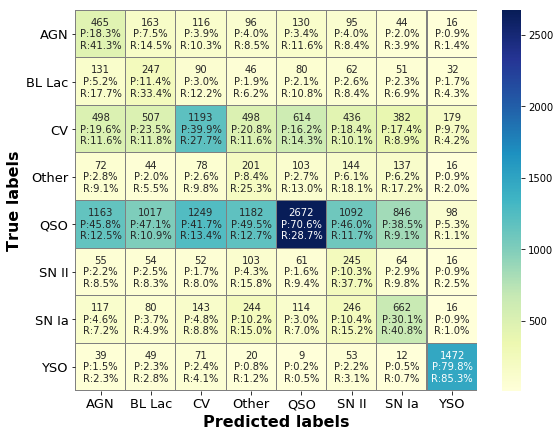

In [7]:
#Confusion Matrix
cmadt = confusion_matrix(y_test, DT.predict(X_test))
heatmapconf_recall_prec(cmadt, label)

### Support Vector Machine

In [9]:
#---------------
#SVM
#--------------

#Model training
tic = timeit.default_timer()

#-----------------------------------------------------------------------------------------------------------
SVC = SVC(C = 100, gamma = 0.1, kernel = 'rbf',  random_state = seed, class_weight = 'balanced')
SVC.fit(X_train, y_train)
#-----------------------------------------------------------------------------------------------------------

toc = timeit.default_timer()
TimeSVC = toc - tic
print ("Computation time = " + str((toc - tic)) + "s") 

Computation time = 7812.6326774s


In [6]:
tic = timeit.default_timer()

#-----------------------------------------------------------------------------------------------------------
#Stratified 4-fold cross validation
skf = StratifiedKFold(n_splits=4, random_state = seed)
crossSVC = cross_val_score(SVC, X_train, y_train, cv=skf, scoring= "accuracy")

print('The cross-validation values for 4 sets are', crossSVC)
print('The cross validation average on the 4 sets is {0:.3f}'.format(np.mean(crossSVC)))
print('-------------------------------------------------------------------------------------------')
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, SVC.predict(X_test))))
#-----------------------------------------------------------------------------------------------------------

toc = timeit.default_timer()
TimeDT = toc -tic
print ("Computation time Parameters = " + str((toc - tic)) + "s") 

The cross-validation values for 4 sets are [0.49260501 0.48939947 0.49990138 0.49975343]
The cross validation average on the 4 sets is 0.495
-------------------------------------------------------------------------------------------
Accuracy: 0.50552
Computation time Parameters = 15397.2029913s


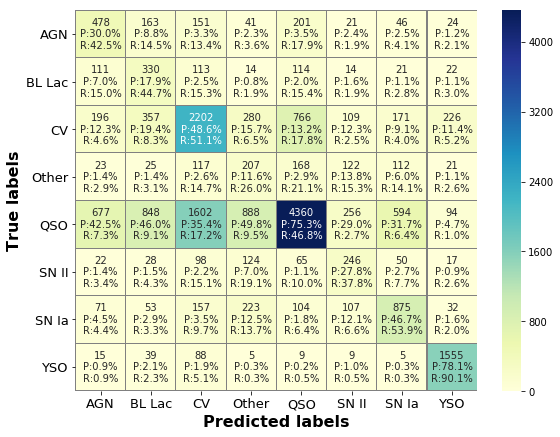

In [16]:
#Confusion Matrix
cmasvc = confusion_matrix(y_test, SVC.predict(X_test))
heatmapconf_recall_prec(cmasvc, label)

### Random Forest

##### class_weight = 'balanced'

In [17]:
#---------------
#RF-balanced
#--------------

#Model training
tic = timeit.default_timer()

#-----------------------------------------------------------------------------------------------------------
RF_bal = RandomForestClassifier(max_depth= None, n_estimators = 400, criterion = 'gini',\
                                max_features =  'sqrt', random_state = seed, n_jobs = -1, class_weight = 'balanced')
RF_bal.fit(X_train, y_train)
#-----------------------------------------------------------------------------------------------------------

toc = timeit.default_timer()
TimeRF = toc - tic
print ("Computation time = " + str((toc - tic)) + "s") 

Computation time = 256.7986920000003s


In [18]:
tic = timeit.default_timer()

#-----------------------------------------------------------------------------------------------------------
#Stratified 4-fold cross validation
skf = StratifiedKFold(n_splits=4, random_state = seed)
crossRF_bal = cross_val_score(RF_bal, X_train, y_train, cv=skf, scoring= "accuracy")

print('The cross-validation values for 4 sets are', crossRF_bal)
print('The cross validation average on the 4 sets is {0:.3f}'.format(np.mean(crossRF_bal)))
print('-------------------------------------------------------------------------------------------')
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, RF_bal.predict(X_test))))
#-----------------------------------------------------------------------------------------------------------

toc = timeit.default_timer()
TimeDT = toc -tic
print ("Computation time Parameters = " + str((toc - tic)) + "s") 

The cross-validation values for 4 sets are [0.63350424 0.62907997 0.6311144  0.62777394]
The cross validation average on the 4 sets is 0.630
-------------------------------------------------------------------------------------------
Accuracy: 0.63993
Computation time Parameters = 760.1253029999971s


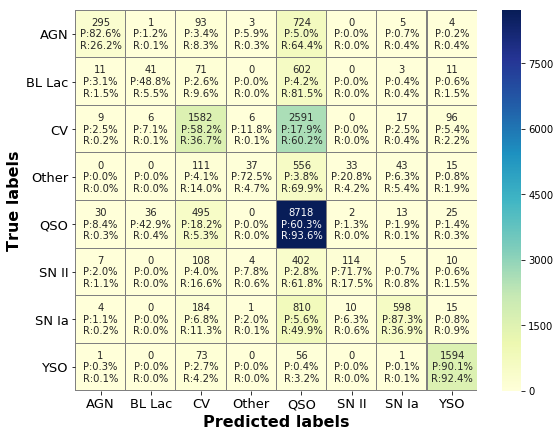

In [20]:
#Confusion Matrix
cmaRF_bal = confusion_matrix(y_test, RF_bal.predict(X_test))
heatmapconf_recall_prec(cmaRF_bal, label)

##### class_weight = 'balanced_subsample'

In [21]:
#---------------------
#RF-balanced_subsample
#---------------------

#Model training
tic = timeit.default_timer()

#-----------------------------------------------------------------------------------------------------------
RF_bs = RandomForestClassifier(max_depth= None, n_estimators = 400, criterion = 'gini',\
                                max_features =  'sqrt', random_state = seed, n_jobs = -1, class_weight = 'balanced_subsample')
RF_bs.fit(X_train, y_train)
#-----------------------------------------------------------------------------------------------------------

toc = timeit.default_timer()
TimeRF_bs = toc - tic
print ("Computation time = " + str((toc - tic)) + "s") 

Computation time = 258.8767692000001s


In [22]:
tic = timeit.default_timer()

#-----------------------------------------------------------------------------------------------------------
#Stratified 4-fold cross validation
skf = StratifiedKFold(n_splits=4, random_state = seed)
crossRF_bs = cross_val_score(RF_bs, X_train, y_train, cv=skf, scoring= "accuracy")

print('The cross-validation values for 4 sets are', crossRF_bs)
print('The cross validation average on the 4 sets is {0:.3f}'.format(np.mean(crossRF_bs)))
print('-------------------------------------------------------------------------------------------')
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, RF_bs.predict(X_test))))
#-----------------------------------------------------------------------------------------------------------

toc = timeit.default_timer()
TimeDT = toc -tic
print ("Computation time Parameters = " + str((toc - tic)) + "s") 

The cross-validation values for 4 sets are [0.63429304 0.62893206 0.63027613 0.63053556]
The cross validation average on the 4 sets is 0.631
-------------------------------------------------------------------------------------------
Accuracy: 0.64111
Computation time Parameters = 769.9447026000016s


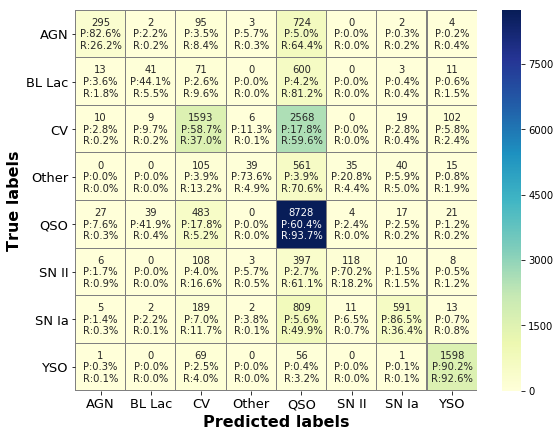

In [24]:
#Confusion Matrix
cmaRF_bs = confusion_matrix(y_test, RF_bs.predict(X_test))
heatmapconf_recall_prec(cmaRF_bs, label)

### Gradient Boosting Classifier

In [10]:
#---------------
#GBC
#--------------
#Model training
tic = timeit.default_timer()

#-----------------------------------------------------------------------------------------------------------
GBC = ensemble.GradientBoostingClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 200, random_state = seed)
GBC.fit(X_train, y_train)
#-----------------------------------------------------------------------------------------------------------

toc = timeit.default_timer()
TimeRF = toc - tic
print ("Computation time = " + str((toc - tic)) + "s") 

Computation time = 8239.2820384s


In [10]:
tic = timeit.default_timer()

#-----------------------------------------------------------------------------------------------------------
#Stratified 4-fold cross validation
skf = StratifiedKFold(n_splits=4, random_state = seed)
crossGBC = cross_val_score(GBC, X_train, y_train, cv=skf, scoring= "accuracy")

print('The cross-validation values for 4 sets are', crossGBC)
print('The cross validation average on the 4 sets is {0:.3f}'.format(np.mean(crossGBC)))
print('-------------------------------------------------------------------------------------------')
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, GBC.predict(X_test))))
#-----------------------------------------------------------------------------------------------------------

toc = timeit.default_timer()
TimeDT = toc -tic
print ("Computation time Parameters = " + str((toc - tic)) + "s") 

The cross-validation values for 4 sets are [0.65973181 0.65422542 0.66242604 0.65795443]
The cross validation average on the 4 sets is 0.659
-------------------------------------------------------------------------------------------
Accuracy: 0.66843
Computation time Parameters = 21839.4296178s


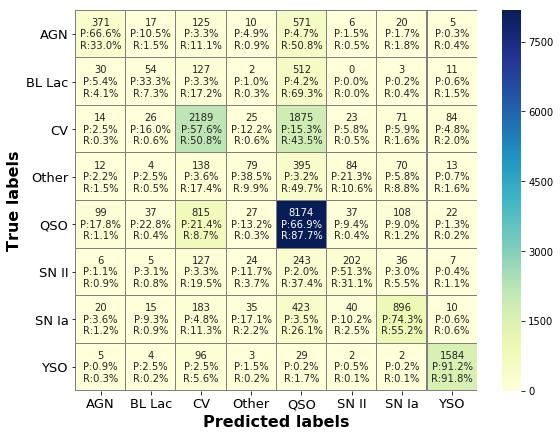

In [14]:
#Confusion Matrix
cmaGBC = confusion_matrix(y_test, GBC.predict(X_test))
heatmapconf_recall_prec(cmaGBC, label)

### Metrics 

In [25]:
#Metrics function
def metrics(Xtest, ytest, av, decimal, names, models):
    subset_metrics  = pd.DataFrame()

    for i, model in enumerate(models):
        metrics = {'Model': names[i],
                   'Precision': round(precision_score(ytest, model.predict(Xtest), average = av), decimal),
                   'Recall': round(recall_score(ytest, model.predict(Xtest), average = av), decimal),
                   'F1 score': round(f1_score(ytest, model.predict(Xtest), average = av), decimal),
                   'Accuracy': round(accuracy_score(ytest, model.predict(Xtest)), decimal)}
        df_mod = pd.DataFrame(metrics, index=[i])
        subset_metrics = pd.concat([subset_metrics , df_mod])
    return subset_metrics

In [26]:
nam = ['DT', 'SVM', 'RF_bal', 'RF_bs', 'GBC']
mod = [DT, SVC, RF_bal, RF_bs, GBC]

metrics(X_test, y_test, 'macro', 3, nam, mod)

,Model,Precision,Recall,F1 score,Accuracy
0,DT,0.336,0.400,0.327,0.353
1,SVM,0.420,0.491,0.438,0.506
2,RF_bal,0.714,0.392,0.435,0.640
3,RF_bs,0.708,0.393,0.437,0.641
4,GBC,0.600,0.459,0.494,0.668
